In [1]:
import pandas as pd 
import networkx as nx 
from tqdm import tqdm 
tqdm.pandas()
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm 
from datetime import datetime 
import csv 
from utils_graph import *


In [2]:

GC = build_graph_from_csv('../data/conceptnet.en.csv', type='undirected')
GS = build_graph_from_csv('../data/swow.en.csv', type='undirected')


In [3]:
# from utils_graph import GraphEditDistance
custom_ged=True 
if custom_ged: 
    GED = GraphEditDistance(e_del_cost =1, e_ins_cost=0, n_del_cost=1, n_ins_cost=0)
else:
    GED = GraphEditDistance(e_del_cost =1, e_ins_cost=1, n_del_cost=1, n_ins_cost=1)

def subgraph_info(triples):
    if len(triples) == 0:
        avg_deg, avg_density= 0, 0   

    G = build_graph_from_triples(triples, type='undirected')
   
    G1 = GC.subgraph(G.nodes)
    G2 = GS.subgraph(G.nodes)

    ged1 = GED.get_graph_edit_distance(G, G1)
    ged2 = GED.get_graph_edit_distance(G, G2)
    ged3 = GED.get_graph_edit_distance(G1, G2)
    
    g1_iso = nx.is_isomorphic(G,G1)
    g2_iso = nx.is_isomorphic(G,G2)
    # nx.triangles(G1)
    # nx.

    avg_deg = average_degree(G)
    density = nx.density(G)

    avg_deg1 = average_degree(G1)
    density1 = nx.density(G1)

    avg_deg2 = average_degree(G2)
    density2 = nx.density(G2)

    return pd.Series([avg_deg, avg_deg1, avg_deg2, density,  density1,  density2, ged1, ged2, ged3])


In [4]:
def graph_info(path, output_path=None):
    '''
    a) read a csv file and b)build a graph for each triples in each row; c) get graph info of individual graphs; d) get the average info over all graphs
    '''
    df = read_scripts_triples(path)

    df[['avg_deg_mcscript2', 'avg_deg_conceptnet','avg_deg_swow','density_mcscript2','density_conceptnet','density_swow', 'ged_cn', 'ged_sw', 'ged3']] = df['triple_lemma'].progress_apply(lambda x: subgraph_info(eval(x)))
    # df = df.query('avg_deg_mcscript2!=0 and density_mcscript2!=0')
    
    
    if output_path is not None:
        df.to_csv(output_path)
    print(f'save {output_path} {len(df.index)} lines')
    mean_std_statistics(df, output_path=f"{output_path}_info.csv")
    
    return df 
    

In [6]:
  
path = '../output/mcscript2.csv_frame_lemma.csv'
output_path = '../output/mcscript2.csv_graph.csv'
df = graph_info(path, output_path)

  0%|          | 2/3464 [00:00<03:13, 17.90it/s]
removing invalid scripts 23 
 remaining 3464 scripts
100%|██████████| 3464/3464 [03:21<00:00, 17.23it/s]avg_deg_mcscript2     1.76±0.54
avg_deg_conceptnet    1.41±0.79
avg_deg_swow          2.12±1.06
density_mcscript2     0.17±0.14
density_conceptnet    0.11±0.08
density_swow           0.18±0.1
ged_cn                0.82±0.28
ged_sw                0.81±0.29
ged3                  0.42±0.35
Name: mean±std, dtype: object



NameError: name 'df_out' is not defined

avg_deg_mcscript2     1.76±0.54
avg_deg_conceptnet    1.41±0.79
avg_deg_swow          2.12±1.06
density_mcscript2     0.17±0.14
density_conceptnet    0.11±0.08
density_swow           0.18±0.1
ged_cn                0.82±0.28
ged_sw                 0.8±0.29
ged3                  0.41±0.34
Name: mean±std, dtype: object
            ged_cn       ged_sw
count  3464.000000  3464.000000
mean      0.821006     0.804247
std       0.277977     0.286732
min       0.000000     0.000000
25%       0.647059     0.625000
50%       0.789474     0.777778
75%       0.944444     0.944444
max       2.846154     3.000000


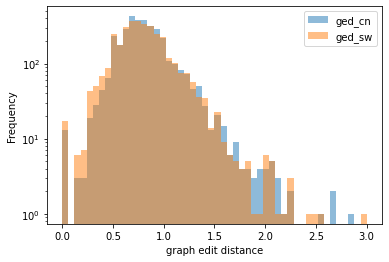

In [13]:
df = pd.read_csv(output_path)
plt.close("all")

# df = df.query('ged1<=50 & ged2<50')

mean_std_statistics(df)
print(df[['ged_cn', 'ged_sw']].describe())
fig, ax = plt.subplots()
df[['ged_cn', 'ged_sw']].plot(ax=ax, kind="hist", alpha=0.5, bins=50)
ax.set_yscale('log')
ax.set_xlabel('graph edit distance')
plt.show()
fig = ax.get_figure()
fig.savefig("../log/ged_distribution.pdf")



In [13]:
g1_iso_percent = len(df.query('g1_iso==True').index)/len(df.index)
g2_iso_percent = len(df.query('g2_iso==True').index)/len(df.index)
print(g1_iso_percent)
print(g2_iso_percent)

0.004618937644341801
0.006928406466512702


In [ ]:
# df[['ged1']].plot(kind="hist", width=5, alpha=0.5)
# plt.show()
# df[['ged2']].plot(kind="hist", width=5, alpha=0.5)
# plt.show()
# df[['ged3']].plot(kind="hist", width=5, alpha=0.5)
# plt.show()
# def graph_visualization(df):
# df['avg_deg_mcscript2'].plot(x="avg_deg_mcscript2", y="Median", kind="bar", rot=5, fontsize=4)
# fig, ax = plt.subplots()

# df.hist(column=['avg_deg_mcscript2','avg_deg_conceptnet', 'avg_deg_swow'], alpha=0.5, width=0.5, sharex=True, sharey=True, bins=8)

# df[['avg_deg_mcscript2', 'avg_deg_conceptnet', 'avg_deg_swow']].plot(kind="hist", width=0.5, alpha=0.5, bins=8)
# df[['density_mcscript2','density_conceptnet','density_swow']].plot(kind="hist", width=0.05, alpha=0.5)
# df.hist(column=['density_mcscript2','density_conceptnet','density_swow'], alpha=0.5, width=0.1)

# df['avg_deg_mcscript2'].plot.bar()
# df[['avg_deg_mcscript2','density_mcscript2']].plot.bar()

# out = pd.cut(df['ged1'], bins=[0, 1, 2, 3,4,5,6], include_lowest=True)
# ax = out.value_counts(sort=False).plot.bar(rot=0, figsize=(6,4))
# plt.show()

# out = pd.cut(df['ged2'], bins=[0, 1, 2, 3,4,5,6], include_lowest=True)
# ax1 = out.value_counts(sort=False).plot.bar(rot=0, figsize=(6,4))
# plt.show()
# out = pd.cut(df['ged3'], bins=[0, 1, 2, 3,4,5,6], include_lowest=True)
# ax2 = out.value_counts(sort=False).plot.bar(rot=0, figsize=(6,4))
# # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])

# plt.show()
# graph_visualization(df)

# print(dfn.head(5))

In [6]:
def test_sample():
    df = pd.read_csv(path)
    G = build_graph_from_triples(df.iloc[50])
   
    G1 = GC.subgraph(G.nodes)
    G2 = GS.subgraph(G.nodes)


In [8]:
G1 = nx.cycle_graph(6)
G2 = nx.wheel_graph(7)
ged = next(nx.optimize_graph_edit_distance(G1, G2))

print(ged)
for v in nx.optimize_graph_edit_distance(G1, G2):
    minv = v
    print(minv)
print(minv)

path, cost = nx.optimal_edit_paths(G1, G2)
# print(path)
print(cost)


7.0
7.0
7.0
7.0
